<a href="https://colab.research.google.com/github/shinbad/small_project/blob/main/healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/기계학습/project/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## id

In [ ]:
df['id'].dtype

dtype('int64')

In [ ]:
df['id'].isnull().sum()

0

In [ ]:
len(pd.unique(df['id']))

5110

## Target

In [ ]:
df['stroke'].dtype

dtype('int64')

In [ ]:
df['stroke'].isnull().sum()

0

In [ ]:
df['stroke'].value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df['stroke'].value_counts(dropna=False, normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

## 기타 변수 데이터 처리

In [ ]:
cols = ['age', 'avg_glucose_level', 'bmi']
df[cols].dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [ ]:
c = df['age']>18
df[c].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
len(df[c])

4194

In [ ]:
len(df[c])/len(df)

0.8207436399217222

In [ ]:
df1=df[c]
df1.shape

(4194, 12)

In [ ]:
df1=df1.rename(columns={'Residence_type':'residence_type'})

In [ ]:
cols1=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
df1[cols1].isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
smoking_status    0
dtype: int64

In [ ]:
df1[cols1].dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
residence_type    object
smoking_status    object
dtype: object

## 결측값 변수 제거

In [ ]:
df1.isna().any()[lambda x:x]

bmi    True
dtype: bool

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [ ]:
cols=['age','avg_glucose_level', 'bmi']
df1[cols].describe()

,age,avg_glucose_level,bmi
count,4194.000000,4194.000000,4014.000000
mean,50.662852,108.632995,30.493921
std,17.532031,48.004093,7.222288
min,19.000000,55.120000,11.300000
25%,37.000000,77.420000,25.500000
50%,51.000000,92.360000,29.300000
75%,64.000000,116.225000,34.200000
max,82.000000,271.740000,92.000000


In [ ]:
df1[cols].skew()

age                  0.027804
avg_glucose_level    1.450949
bmi                  1.240993
dtype: float64

In [ ]:
df1[cols].kurtosis()

age                 -1.020418
avg_glucose_level    1.093929
bmi                  3.445238
dtype: float64

In [ ]:
df1['work_type'].value_counts(dropna=False)

Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: work_type, dtype: int64

In [ ]:
pd.crosstab(df1['work_type'], columns='count')

col_0,count
work_type,
Govt_job,648
Never_worked,2
Private,2740
Self-employed,804


In [ ]:
pd.crosstab(df1['work_type'], df1['stroke'])

stroke,0,1
work_type,,
Govt_job,615,33
Never_worked,2,0
Private,2591,149
Self-employed,739,65


In [ ]:
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)

stroke,0,1
work_type,,
Govt_job,0.146638,0.007868
Never_worked,0.000477,0.000000
Private,0.617787,0.035527
Self-employed,0.176204,0.015498


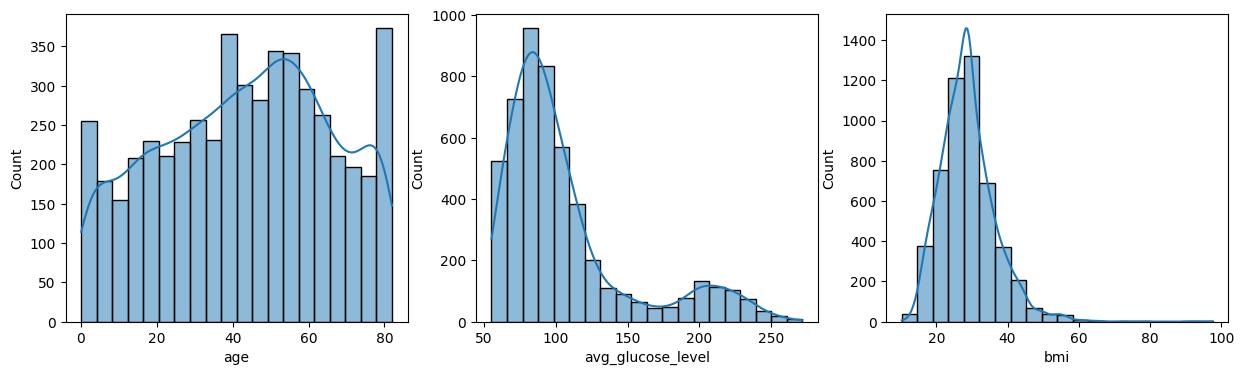

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(ax=axes[0], data=df, x='age', kde=True, bins=20)
sns.histplot(ax=axes[1], data=df, x='avg_glucose_level', kde=True, bins=20)
sns.histplot(ax=axes[2], data=df, x='bmi', kde=True, bins=20)
plt.show()

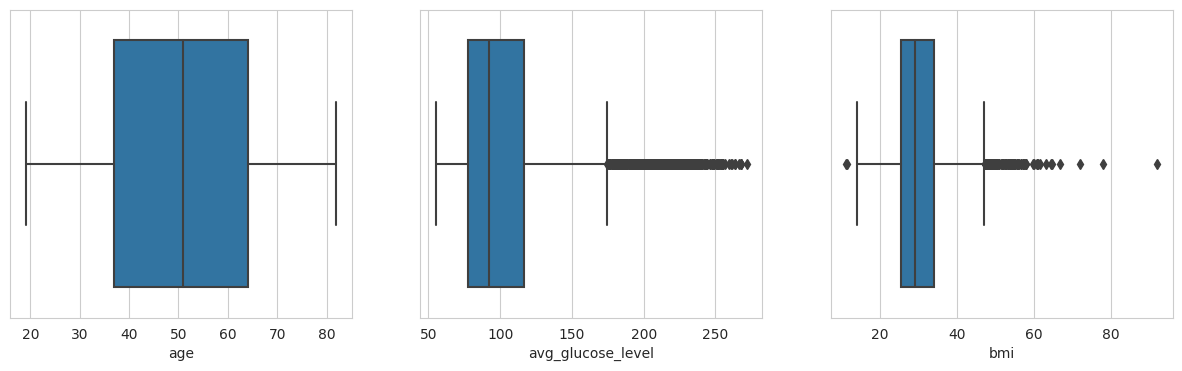

In [ ]:
sns.set_style('whitegrid')

fig, axes=plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(ax=axes[0], x='age', data=df1)
sns.boxplot(ax=axes[1], x='avg_glucose_level', data=df1)
sns.boxplot(ax=axes[2], x='bmi', data=df1)
plt.show()

In [ ]:
Q1 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3-Q1
print(IQR)

age                  27.000
avg_glucose_level    38.805
bmi                   8.700
dtype: float64


In [ ]:
Lower=Q1-3.0+IQR
Upper=Q3+3.0+IQR
print('Lower:')
print(Lower)
print('\n----------------------\n\nUpper:')
print(Upper)

Lower:
age                   61.000
avg_glucose_level    113.225
bmi                   31.200
dtype: float64

----------------------

Upper:
age                   94.00
avg_glucose_level    158.03
bmi                   45.90
dtype: float64


In [ ]:
c1=df1['avg_glucose_level']<=232.64
c2=df1['bmi']<=60.3

df2=df1[c1&c2]
df2.shape

(3915, 12)

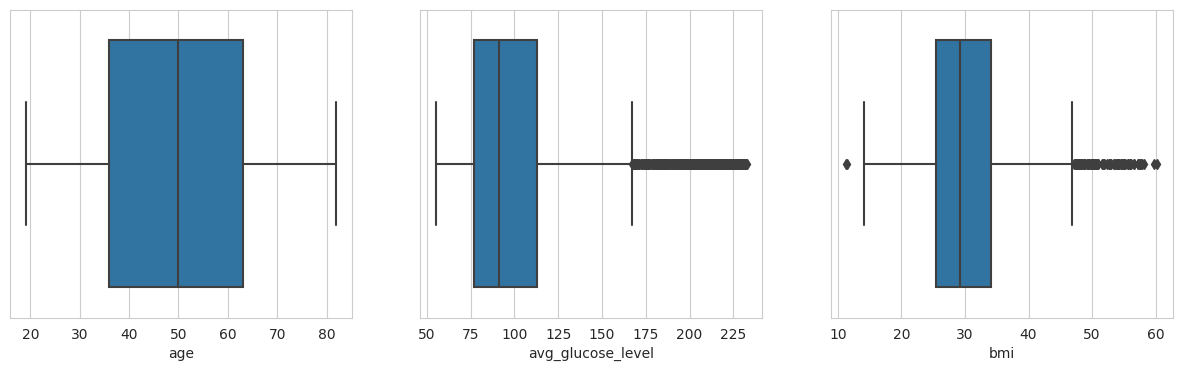

In [ ]:
fig, axes=plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(ax=axes[0], x='age', data=df2)
sns.boxplot(ax=axes[1], x='avg_glucose_level', data=df2)
sns.boxplot(ax=axes[2], x='bmi', data=df2)
plt.show()

In [ ]:
cols=['age', 'avg_glucose_level','bmi']
round(df2[cols].corr(),2)

,age,avg_glucose_level,bmi
age,1.00,0.20,0.02
avg_glucose_level,0.20,1.00,0.16
bmi,0.02,0.16,1.00


<Axes: >

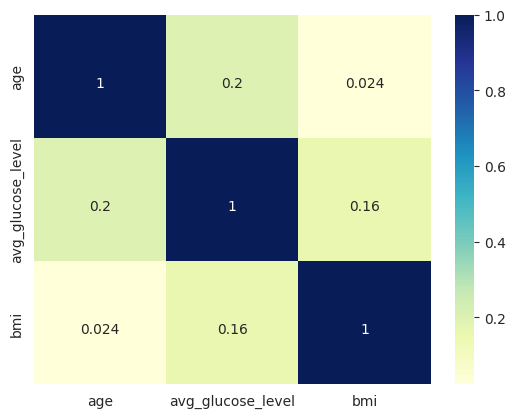

In [ ]:
corr = df2[cols].corr()
annot_kws={'ha': 'center', 'va': 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws,cmap='YlGnBu' )

In [ ]:
df2.to_csv('healthcare-dataset-2.csv', index=False)

# 시각화

In [ ]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/기계학습/project/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
categorical_columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status', 'stroke']
categorical_axis = ['name of gender', 'hypertensive','heart_disease', 'married', 'place of work', 'type of residence', 'smokes']

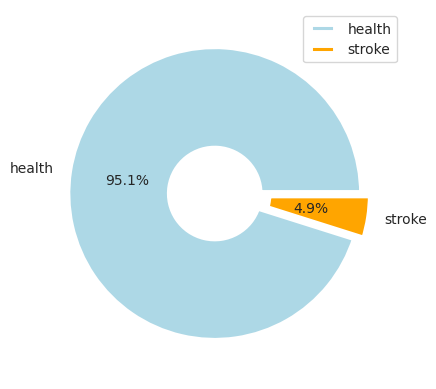

In [ ]:
observation_values=['health', 'stroke']
total_observation = list(df['stroke'].value_counts())

plt.pie(total_observation,labels=observation_values, autopct='%1.1f%%',colors=['lightblue','orange'],explode = [0.03, 0.03], wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.legend()
plt.show()

In [ ]:
df['stroke'].value_counts().index

Int64Index([0, 1], dtype='int64')

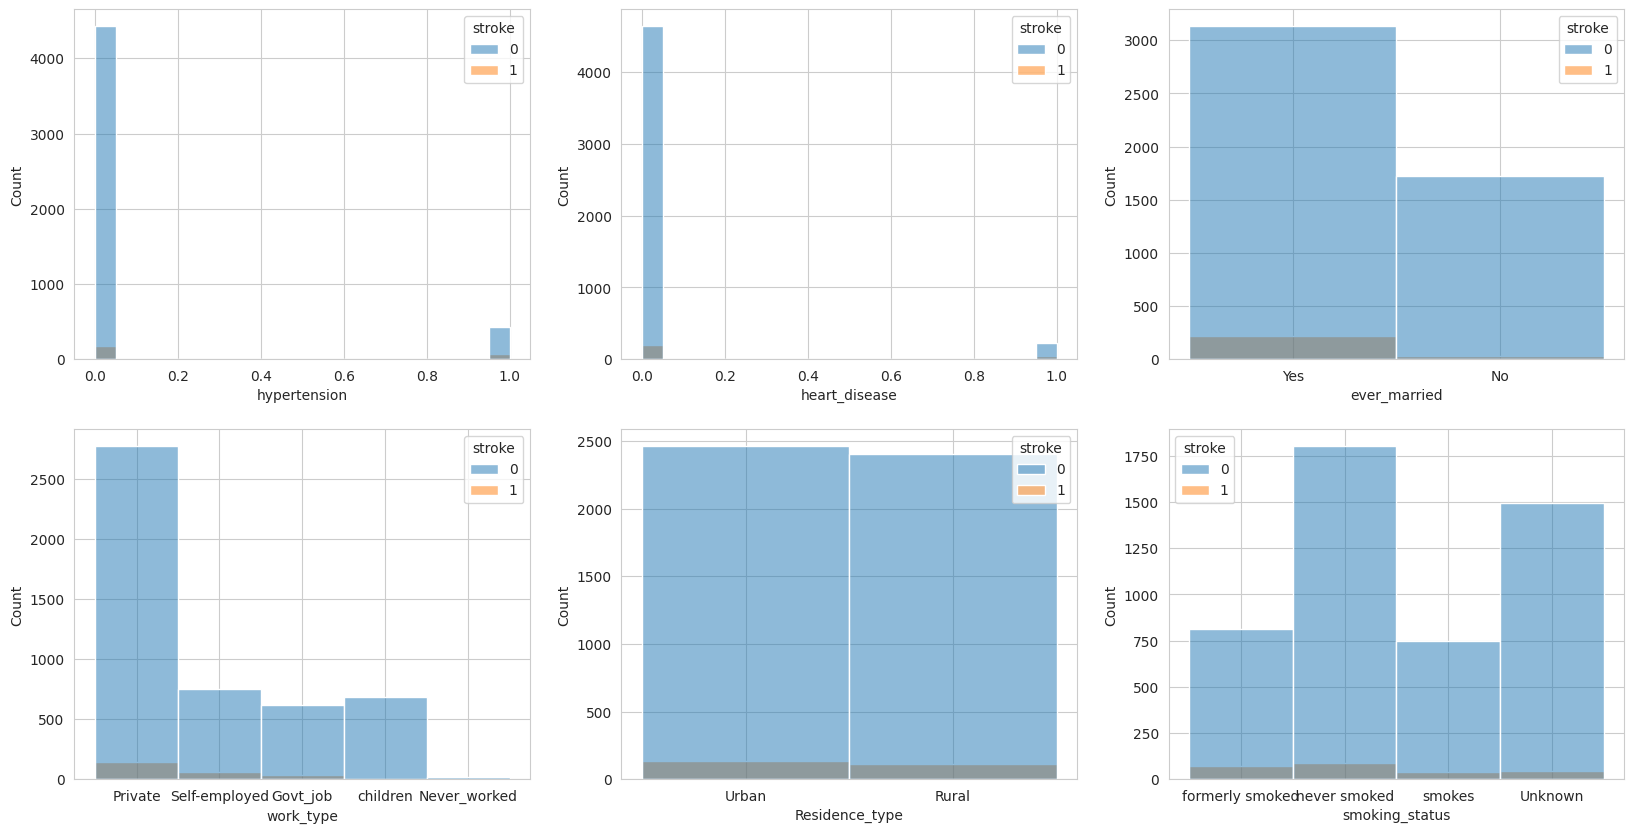

In [ ]:
cols=['hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status']
fig, axes = plt.subplots(2, 3, figsize=(20,10))

for i in range(2):
  for j in range(3):
    sns.histplot(ax=axes[i][j],data=df, x=cols[3*i+j], hue='stroke', bins=20)

<Axes: xlabel='bmi', ylabel='Count'>

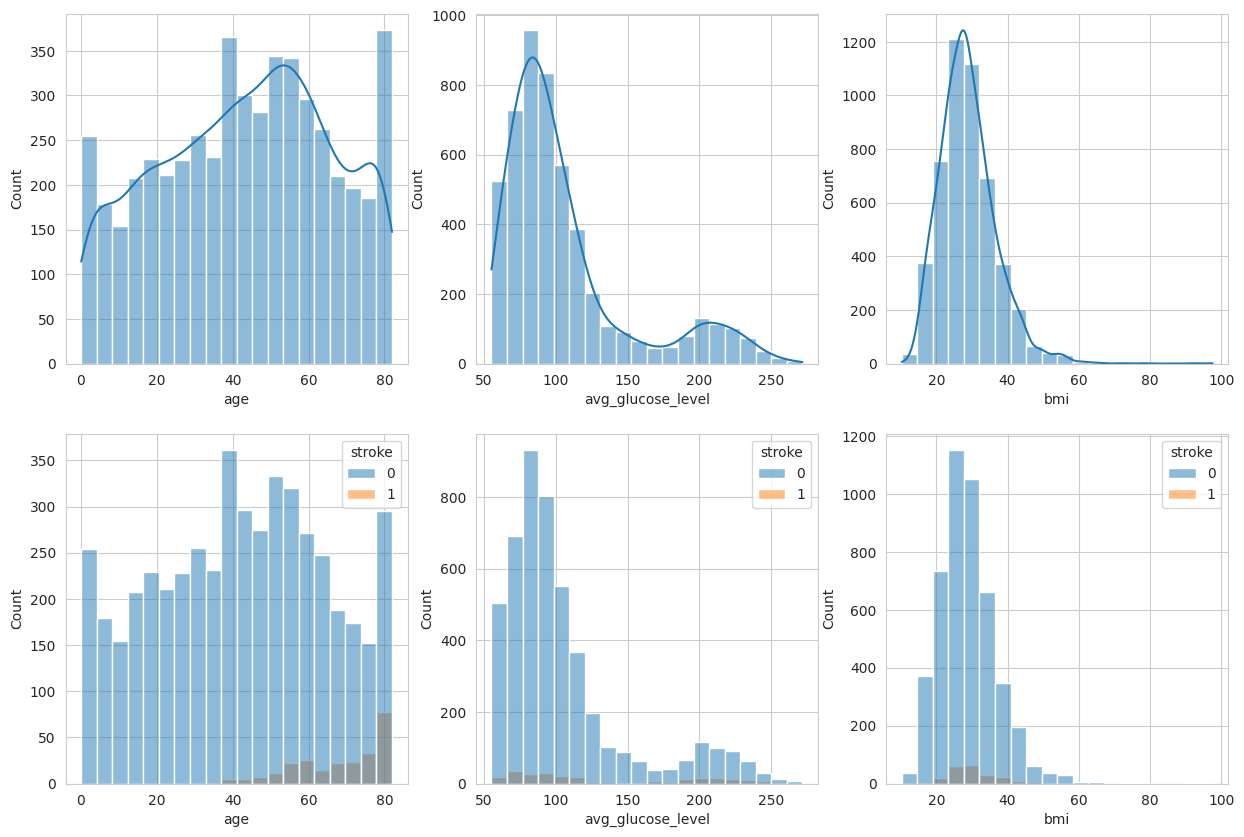

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15,10))

sns.histplot(ax=axes[0][0], data=df, x='age', kde=True, bins=20)
sns.histplot(ax=axes[0][1], data=df, x='avg_glucose_level', kde=True, bins=20)
sns.histplot(ax=axes[0][2], data=df, x='bmi', kde=True, bins=20)

sns.histplot(ax=axes[1][0],data=df, x='age', hue='stroke', bins=20)
sns.histplot(ax=axes[1][1],data=df, x='avg_glucose_level', hue='stroke', bins=20)
sns.histplot(ax=axes[1][2],data=df, x='bmi', hue='stroke', bins=20)

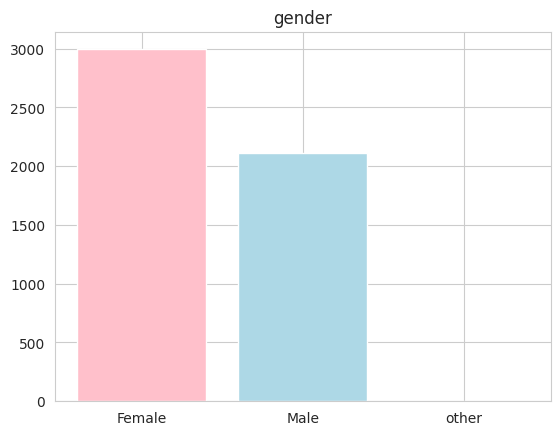

In [ ]:
plt.title('gender')
plt.bar(['Female','Male', 'other'],df['gender'].value_counts(), color=['pink','lightblue'])
plt.show()

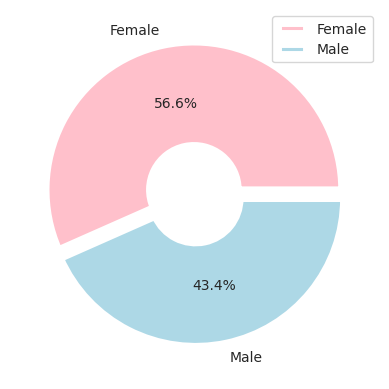

In [ ]:
stroke_population = df.query('stroke ==1').copy()

plt.pie(stroke_population.gender.value_counts(),labels=['Female','Male'], autopct='%1.1f%%', colors=['pink','lightblue'],explode = [0.03, 0.03], wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.legend()
plt.show()

In [ ]:
group = df['age'].groupby(df['stroke'])
group.mean()

stroke
0    41.971545
1    67.728193
Name: age, dtype: float64

In [ ]:
from scipy.stats import skew

# 왜도
df[['age','bmi', 'avg_glucose_level']].skew()

age                 -0.137059
bmi                  1.055340
avg_glucose_level    1.572284
dtype: float64

# Model

## 최종 데이터 처리

In [ ]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3915 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3915 non-null   int64  
 1   gender             3915 non-null   object 
 2   age                3915 non-null   float64
 3   hypertension       3915 non-null   int64  
 4   heart_disease      3915 non-null   int64  
 5   ever_married       3915 non-null   object 
 6   work_type          3915 non-null   object 
 7   residence_type     3915 non-null   object 
 8   avg_glucose_level  3915 non-null   float64
 9   bmi                3915 non-null   float64
 10  smoking_status     3915 non-null   object 
 11  stroke             3915 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 397.6+ KB


In [ ]:
df2[df2['gender']=='Other']['gender'].count()

1

In [ ]:
data = df2[df2['gender']!='Other']
data[data['gender']=='Other']['gender'].count()

0

In [ ]:
data['gender']=data['gender'].replace(['Male', 'Female'], [1, 0])

<ipython-input-54-c13c1a1fca9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender']=data['gender'].replace(['Male', 'Female'], [1, 0])


In [ ]:
data['ever_married']=df2['ever_married'].replace(['Yes', 'No'], [1, 0])

<ipython-input-55-a7a4379faf61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ever_married']=df2['ever_married'].replace(['Yes', 'No'], [1, 0])


In [ ]:
dummies = pd.get_dummies(data, columns = ["work_type", "residence_type", "smoking_status"]).copy()
df_h = dummies
df_h.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,1,0,1,0,0
2,31112,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
5,56669,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,1,0,1,0,0


In [ ]:
df_h.drop(['id'], axis=1, inplace=True)
df_h.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,1,0,1,0,0
2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1
4,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
5,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ["age", "avg_glucose_level", "bmi"]
df_h[columns] = scaler.fit_transform(df_h[columns])
df_h.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.969252,0,1,1,2.888085,0.904265,1,0,0,1,0,0,1,0,1,0,0
2,1,1.713868,0,1,1,0.029338,0.312524,1,0,0,1,0,1,0,0,0,1,0
3,0,-0.061756,0,0,1,1.550107,0.586745,1,0,0,1,0,0,1,0,0,0,1
4,0,1.656590,1,0,1,1.617401,-0.914258,1,0,0,0,1,1,0,0,0,1,0
5,1,1.771146,0,0,1,1.898922,-0.192622,1,0,0,1,0,0,1,0,1,0,0


In [ ]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          3914 non-null   int64  
 1   age                             3914 non-null   float64
 2   hypertension                    3914 non-null   int64  
 3   heart_disease                   3914 non-null   int64  
 4   ever_married                    3914 non-null   int64  
 5   avg_glucose_level               3914 non-null   float64
 6   bmi                             3914 non-null   float64
 7   stroke                          3914 non-null   int64  
 8   work_type_Govt_job              3914 non-null   uint8  
 9   work_type_Never_worked          3914 non-null   uint8  
 10  work_type_Private               3914 non-null   uint8  
 11  work_type_Self-employed         3914 non-null   uint8  
 12  residence_type_Rural            39

In [ ]:
X = df_h.drop('stroke', axis=1)
y = df_h.stroke

## 모델 생성 및 실행(10%)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
X_train_over, X_test, y_train_over, y_test=train_test_split(X,y,test_size=0.1, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(X_train_over, y_train_over)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion(target, pred):
  cm = confusion_matrix(target, pred)

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

  plt.show()

### 로지스틱 회귀

In [ ]:
logistic = LogisticRegression()
scores = cross_val_score(logistic, X_train,y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8354


In [ ]:
logistic.fit(X_train,y_train)
print('학습 정확도 :', logistic.score(X_train, y_train))
print('테스트 정확도 :',logistic.score(X_test, y_test))

학습 정확도 : 0.8386952636282395
테스트 정확도 : 0.8137755102040817


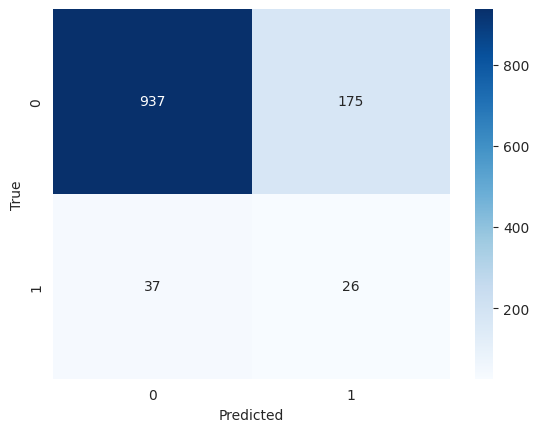

In [ ]:
pred = logistic.predict(X_test)
confusion(y_test, pred)

In [ ]:
from sklearn.metrics import f1_score

# 데이터 스플릿으로 y_valid와 모델 예측으로 y_pred를 구한 후 실행
# 모델 검정이 없다면 y_true값으로 y_valid 대체
f1 = f1_score(y_test, pred)
print(f1)


0.19696969696969696


### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.9181


In [ ]:
knn.fit(X_train, y_train)

print('학습 정확도 :', knn.score(X_train, y_train))
print('테스트 정확도 :',knn.score(X_test, y_test))

학습 정확도 : 0.9644027405421507
테스트 정확도 : 0.8137755102040817


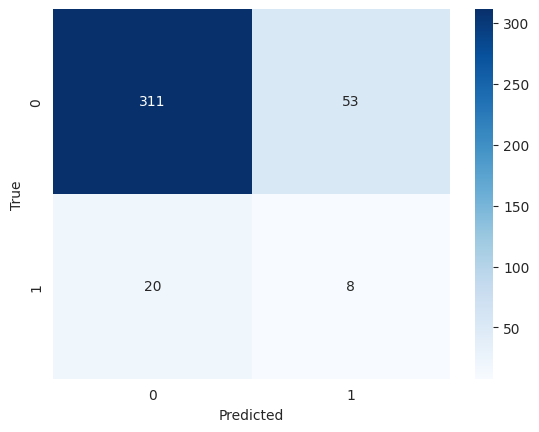

In [ ]:
pred = knn.predict(X_test)
confusion(y_test, pred)

### 결정 트리
**하이퍼파라미터**
- max_depth: 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수
- min_samples_split: 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
scores = cross_val_score(tree, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8031


In [ ]:
tree.fit(X_train, y_train)
print("학습 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도:", tree.score(X_test, y_test))

학습 정확도 : 0.8138218647602026
테스트 정확도: 0.7397959183673469


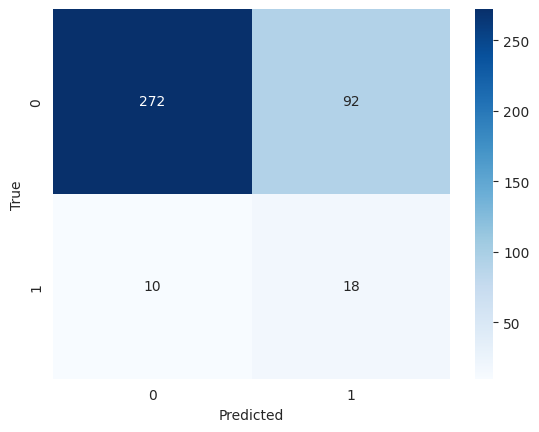

In [ ]:
pred = tree.predict(X_test)
confusion(y_test, pred)

### SVM

In [ ]:
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8347


In [ ]:
clf.fit(X_train, y_train)
print("학습 정확도 :", clf.score(X_train, y_train))
print("테스트 정확도 :", clf.score(X_test, y_test))

학습 정확도 : 0.8385463211200477
테스트 정확도 : 0.8086734693877551


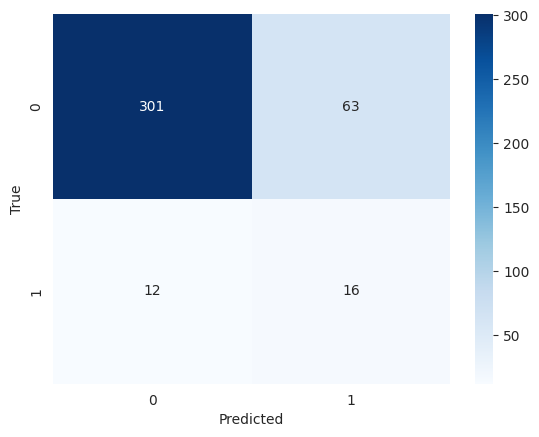

In [ ]:
pred = clf.predict(X_test)
confusion(y_test, pred)

## 모델 생성 및 실행(20%)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
X_train_over, X_test, y_train_over, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train,y_train = smote.fit_resample(X_train_over, y_train_over)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion(target, pred):
  cm = confusion_matrix(target, pred)

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

  plt.show()

### 로지스틱 회귀

In [ ]:
logistic = LogisticRegression()
scores = cross_val_score(logistic, X_train,y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8409


In [ ]:
logistic.fit(X_train,y_train)
print('학습 정확도 :', logistic.score(X_train, y_train))
print('테스트 정확도 :',logistic.score(X_test, y_test))

학습 정확도 : 0.8432785786121354
테스트 정확도 : 0.8275862068965517


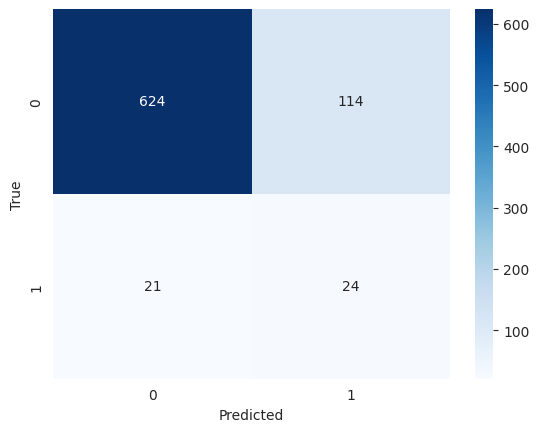

In [ ]:
pred = logistic.predict(X_test)
confusion(y_test, pred)

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.9181


In [ ]:
knn.fit(X_train, y_train)

print('학습 정확도 :', knn.score(X_train, y_train))
print('테스트 정확도 :',knn.score(X_test, y_test))

학습 정확도 : 0.9644027405421507
테스트 정확도 : 0.8137755102040817


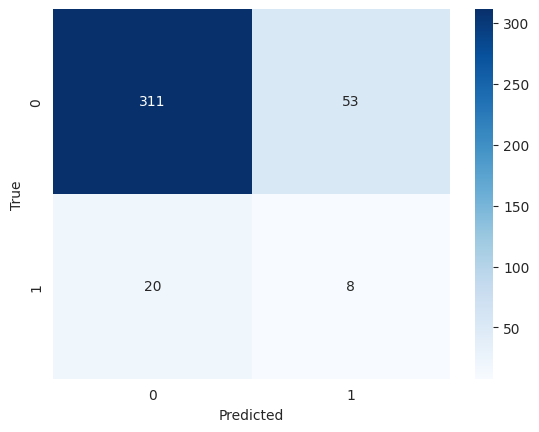

In [ ]:
pred = knn.predict(X_test)
confusion(y_test, pred)

### 결정 트리
**하이퍼파라미터**
- max_depth: 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수
- min_samples_split: 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
scores = cross_val_score(tree, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.7997


In [ ]:
tree.fit(X_train, y_train)
print("학습 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

학습 정확도 : 0.8146161582299698
테스트 정확도 : 0.7318007662835249


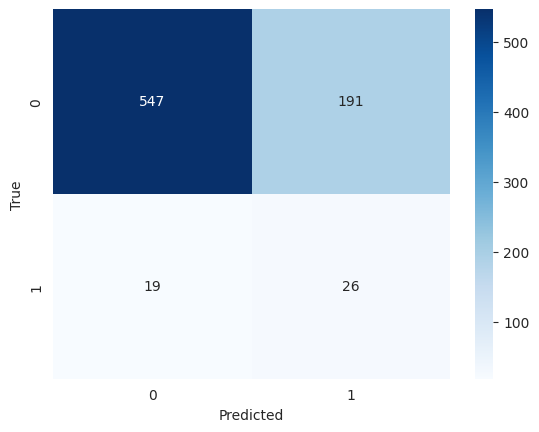

In [ ]:
pred = tree.predict(X_test)
confusion(y_test, pred)

### SVM

In [ ]:
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8384


In [ ]:
clf.fit(X_train, y_train)
print("학습 정확도 :", clf.score(X_train, y_train))
print("테스트 정확도 :", clf.score(X_test, y_test))

학습 정확도 : 0.8409319477036541
테스트 정확도 : 0.8173690932311622


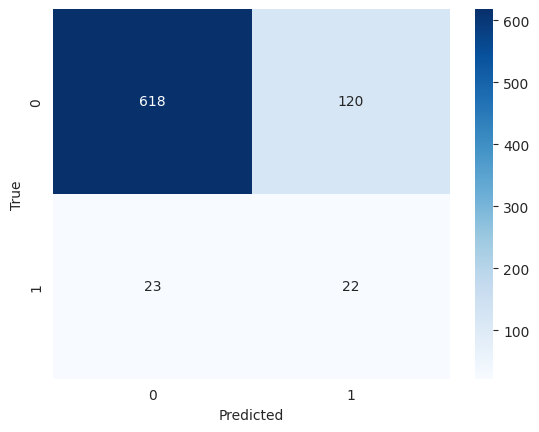

In [ ]:
pred = clf.predict(X_test)
confusion(y_test, pred)

## 모델 생성 및 실행(30%)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
X_train_over, X_test, y_train_over, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train,y_train = smote.fit_resample(X_train_over, y_train_over)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion(target, pred):
  cm = confusion_matrix(target, pred)

  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

  plt.show()

### 로지스틱 회귀

In [ ]:
logistic = LogisticRegression()
scores = cross_val_score(logistic, X_train,y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8488


In [ ]:
logistic.fit(X_train,y_train)
print('학습 정확도 :', logistic.score(X_train, y_train))
print('테스트 정확도 :',logistic.score(X_test, y_test))

학습 정확도 : 0.850709083940207
테스트 정확도 : 0.8195744680851064


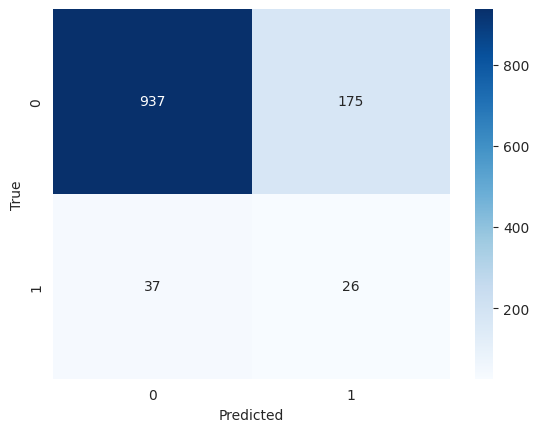

In [ ]:
pred = logistic.predict(X_test)
confusion(y_test, pred)

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.9005


In [ ]:
knn.fit(X_train, y_train)

print('학습 정확도 :', knn.score(X_train, y_train))
print('테스트 정확도 :',knn.score(X_test, y_test))

학습 정확도 : 0.9451897278650824
테스트 정확도 : 0.8204255319148936


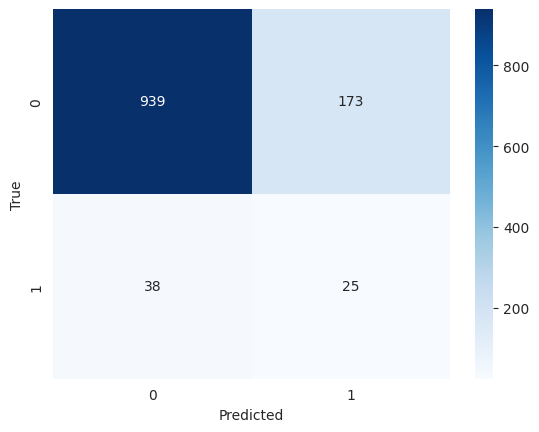

In [ ]:
pred = knn.predict(X_test)
confusion(y_test, pred)

### 결정 트리
**하이퍼파라미터**
- max_depth: 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_features: 최적의 분할을 위해 고려할 최대 feature 개수
- min_samples_split: 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
scores = cross_val_score(tree, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8133


In [ ]:
tree.fit(X_train, y_train)
print("학습 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

학습 정확도 : 0.8325028746646225
테스트 정확도 : 0.7097872340425532


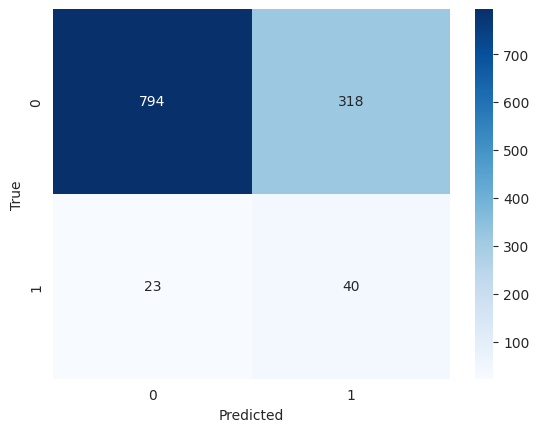

In [ ]:
pred = tree.predict(X_test)
confusion(y_test, pred)

### SVM

In [ ]:
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X_train, y_train, cv=3)
print('교차 검증 평균 정확도 :', np.round(np.mean(scores),4))

교차 검증 평균 정확도 : 0.8507


In [ ]:
clf.fit(X_train, y_train)
print("학습 정확도 :", clf.score(X_train, y_train))
print("테스트 정확도 :", clf.score(X_test, y_test))

학습 정확도 : 0.8532004599463396
테스트 정확도 : 0.8161702127659575


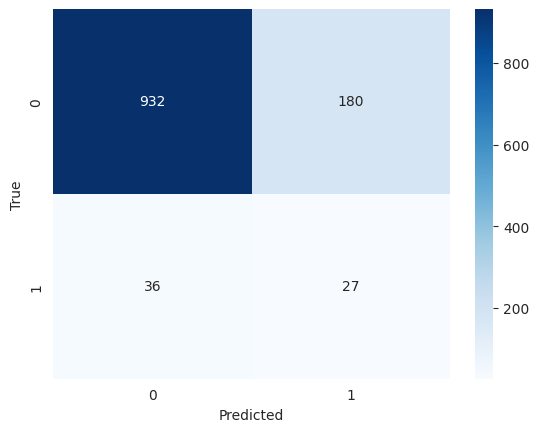

In [ ]:
pred = clf.predict(X_test)
confusion(y_test, pred)